# Pandas Mid Course Consolidation - Solved
## By Harshavardhini G

In [2]:
# 1. import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 2. Load data from SPX file to df
# Read data into a DataFrame
df_SPX = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date', parse_dates=True)

# Use the dtypes attribute to check what types are in each column
# the word 'object' is used to denote a string
print(df_SPX.dtypes)

df_SPX.head()

Price       object
Open        object
High        object
Low         object
Change %    object
dtype: object


,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,"2,673.61","2,689.15","2,692.12","2,673.61",-0.52%
2017-12-28,"2,687.54","2,686.10","2,687.66","2,682.69",0.18%
2017-12-27,"2,682.62","2,682.10","2,685.64","2,678.91",0.08%
2017-12-26,"2,680.50","2,679.09","2,682.74","2,677.96",-0.11%
2017-12-22,"2,683.34","2,684.22","2,685.35","2,678.13",-0.05%


In [4]:
# 3. Convert all columns to numerical
df_SPX['Price'] = pd.to_numeric(df_SPX['Price'].str.replace(',',''))
df_SPX['Open'] = pd.to_numeric(df_SPX['Open'].str.replace(',',''))
df_SPX['High'] = pd.to_numeric(df_SPX['High'].str.replace(',',''))
df_SPX['Low'] = pd.to_numeric(df_SPX['Low'].str.replace(',',''))
df_SPX['Change %'] = pd.to_numeric(df_SPX['Change %'].str.replace('%',''))
#df_SPX[['Open','High','Low']].replace(',','')
print(df_SPX.dtypes)
df_SPX.head()

Price       float64
Open        float64
High        float64
Low         float64
Change %    float64
dtype: object


,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,2673.61,2689.15,2692.12,2673.61,-0.52
2017-12-28,2687.54,2686.10,2687.66,2682.69,0.18
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05


In [10]:
# 4.Sort the dataframe in CHronological order
df_SPX.sort_values(by=['Date'])

,Price,Open,High,Low,Change %
Date,,,,,
2006-01-04,1273.46,1268.80,1275.37,1267.74,0.37
2006-01-05,1273.48,1273.46,1276.91,1270.30,0.00
2006-01-06,1285.45,1273.48,1286.09,1273.48,0.94
2006-01-09,1290.15,1285.45,1290.78,1284.82,0.37
2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.04
...,...,...,...,...,...
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08


,Price,Open,High,Low,Change %
Date,,,,,
2016-06-30,2098.86,2073.17,2098.94,2070.00,1.36
2016-06-29,2070.77,2042.69,2073.13,2042.69,1.70
2016-06-28,2036.09,2006.67,2036.09,2006.67,1.78
2016-06-27,2000.54,2031.45,2031.45,1991.68,-1.81
2016-06-24,2037.41,2103.81,2103.81,2032.57,-3.59
...,...,...,...,...,...
2015-06-08,2079.28,2092.34,2093.01,2079.11,-0.65
2015-06-05,2092.83,2095.09,2100.99,2085.67,-0.14
2015-06-04,2095.84,2112.35,2112.89,2093.23,-0.86


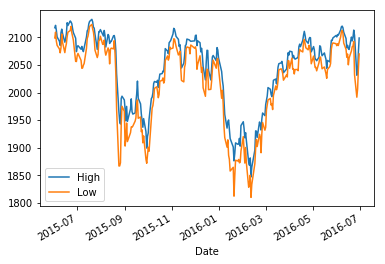

In [13]:
# 5. Plot a line chart: June 2015 to June 2016, High+Low
df1 = df_SPX.query("'2015-06-01' < Date and Date <='2016-06-30'")
display(df1)
df1[['High','Low']].plot()

In [16]:
# 6. Find the min, max, average of all columns
byMonth = pd.Grouper(freq='BM')
funcs = ['max','min','mean']
df2 = df_SPX.groupby(byMonth).agg(funcs)
df2

Price                           Open                        \
                max      min         mean      max      min         mean   
Date                                                                       
2006-01-31  1294.18  1261.49  1279.250000  1294.18  1261.49  1278.653158   
2006-02-28  1294.12  1254.78  1276.645263  1294.12  1254.78  1276.616842   
2006-03-31  1307.25  1272.23  1293.734783  1307.25  1272.23  1293.123913   
2006-04-28  1311.56  1285.33  1302.165263  1311.56  1285.33  1301.777368   
2006-05-31  1325.76  1256.58  1290.013636  1325.76  1256.56  1291.740000   
...             ...      ...          ...      ...      ...          ...   
2017-08-31  2480.91  2425.55  2456.223043  2480.38  2425.50  2456.750000   
2017-09-29  2519.36  2457.85  2492.841000  2509.96  2462.25  2491.332500   
2017-10-31  2581.07  2529.12  2556.997273  2578.08  2521.20  2555.807273   
2017-11-30  2647.58  2564.62  2593.605714  2633.93  2569.45  2590.306190   
2017-12-29  2690.16  2629.27  2664.340500  2692.71  2626.24  2666.070000   

               High                            Low                        \
                max      min         mean      max      min         mean   
Date                                                                       
2006-01-31  1294.90  1268.19  1283.589474  1288.12  1259.42  1274.167368   
2006-02-28  1297.57  1265.78  1281.536316  1289.43  1253.61  1271.135789   
2006-03-31  1310.88  1278.26  1298.765217  1305.32  1268.42  1288.788696   
2006-04-28  1318.16  1290.93  1307.992105  1306.59  1280.74  1296.158421   
2006-05-31  1326.70  1264.53  1297.076818  1322.87  1245.34  1284.194545   
...             ...      ...          ...      ...      ...          ...   
2017-08-31  2490.87  2430.58  2463.660870  2475.88  2417.35  2449.480870   
2017-09-29  2519.44  2467.11  2496.208000  2507.99  2446.55  2486.306500   
2017-10-31  2582.98  2529.23  2560.427727  2572.15  2520.40  2551.009091   
2017-11-30  2657.74  2572.84  2597.430000  2633.93  2557.45  2585.022381   
2017-12-29  2694.97  2634.41  2672.390000  2685.92  2605.52  2658.469000   

           Change %                  
                max   min      mean  
Date                                 
2006-01-31     0.94 -1.83  0.047895  
2006-02-28     1.00 -1.04  0.002632  
2006-03-31     1.04 -0.70  0.049565  
2006-04-28     1.71 -1.03  0.066316  
2006-05-31     1.14 -1.68 -0.138636  
...             ...   ...       ...  
2017-08-31     1.00 -1.54  0.003043  
2017-09-29     1.08 -0.76  0.096000  
2017-10-31     0.81 -0.47  0.099545  
2017-11-30     0.98 -0.55  0.132381  
2017-12-29     0.90 -0.52  0.049000  

[144 rows x 15 columns]